In [30]:
import numpy as np
import matplotlib.pyplot as plt

<img src="./images/Kmeans.png" alt="示例图片" width="1100">

In [28]:
def kmeans(data, k, thresh=1, max_iterations=100):
    # 随机初始化 k 个中心点
    centers = data[np.random.choice(data.shape[0], k, replace=False)] # [k, num_features]
    # 从 n 个样本中取 k 个点
    # replace=False 表示选择时不允许重复，即每个样本只能被选择一次
    
    for _ in range(max_iterations):
        # 计算每个样本到各个中心点的距离
        # centers [k, num_features]
        # data [n, num_features]
        # data[:, None] [n, 1, num_features]
        # 使用 data[:, None] 方便广播, 增加了一个中间的维度，使每个样本都被视为一个独立的组
        # 广播后, centers [k, num_features] -> [1, k, num_features]
        # data[:, None, :] - centers:
        # 广播后，[n, 1, num_features] 将扩展为 [n, k, num_features]，即每个样本会与每个簇中心进行比较。
        # 广播的机制会将第一个维度 n 保持不变，将第二个维度 k 扩展，最后将第三个维度 num_features 对齐。
        # 第二个数组 [1, k, num_features] 会扩展成 [n, k, num_features]，即每个簇中心会重复 n 次与每个样本进行计算。
        # data[:, None, :] - centers: [n, k, num_features]
        distances = np.linalg.norm(data[:, None, :] - centers, axis=2)
        # distance [n, k]
        # np.linalg.norm 函数来计算两个矩阵之间的欧几里得距离（即向量之间的距离）
        
        # 根据距离最近的中心点讲样本分配到对应的簇
        labels = np.argmin(distances, axis=1)
        
        # 更新中心点为每个簇的平均值
        new_centers = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        # 判断中心点是否收敛, 多种收敛条件可选
        # 条件1: 中心点不再改变
        if np.all(centers == new_centers):
            break
        # 条件2: 中心点变化的阈值小于某个阈值
        # center_change = np.linalg.norm(new_centers - centers)
        # if center_change < thresh:
        #     break
        centers = new_centers
    return labels, centers

In [29]:
# 生成一些随机数据作为示例输入
data = np.random.rand(100, 2) # 100 个样本, 吗，每个样本有 2 个特征

# 手动实现 K 均值算法
k = 3 # 聚类数为 3
labels, centers = kmeans(data, k)

print(labels)
print(centers)

[2 1 1 2 2 2 1 0 1 0 0 2 1 1 1 0 0 2 2 1 2 1 2 2 1 0 0 0 2 2 0 2 0 2 2 1 1
 2 2 1 1 2 1 0 1 2 2 2 2 2 0 2 2 2 2 0 2 2 1 1 2 0 0 1 1 1 0 2 0 0 1 2 0 2
 1 0 2 2 2 0 1 2 2 0 0 0 0 0 0 0 0 1 1 1 0 1 2 0 0 2]
[[0.76021743 0.25792912]
 [0.703737   0.79463501]
 [0.19587487 0.41593402]]


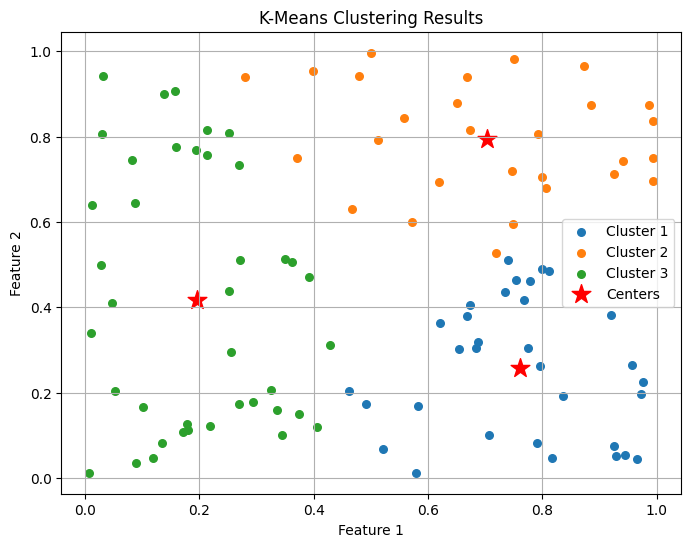

In [31]:
# 在坐标系上展示聚类结果
plt.figure(figsize=(8, 6))

# 绘制每个聚类的样本，使用不同颜色
for i in range(k):
    plt.scatter(data[labels == i][:, 0], data[labels == i][:, 1], label=f'Cluster {i+1}', s=30)

# 绘制聚类中心，使用红色星形标记
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=200, label='Centers')

# 添加标题和标签
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)

# 显示图形
plt.show()